# Normality Tests

### Before testing: just look  

Draw a Q-Q plot, if it obviously deviates from the line (especially in the middle), then it's not normally distributed

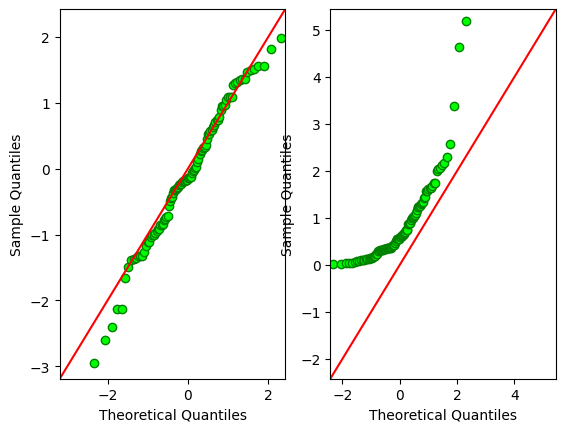

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
  
norm_data = np.random.normal(0, 1, 100)
not_norm_data = np.random.exponential(1, 100)

fig, ax = plt.subplots(1, 2)
sm.qqplot(norm_data, line ='45', markerfacecolor="#00ff00", color="green", ax=ax[0])
sm.qqplot(not_norm_data, line ='45', markerfacecolor="#00ff00", color="green", ax=ax[1])
plt.show()

### Shapiro-Wilk Test

Null hypothesis: Normally distributed

### Anderson-Darling